<a href="https://colab.research.google.com/github/AdibaMuskaan/ML/blob/main/CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

k#CLASSIFICATION

Drive link for Loans Data:  https://drive.google.com/file/d/1HPfEnkQSOG-KFRw0Stt-ph7LdHiarvn6/view?usp=sharing

In [1]:
#import statements
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read loans data csv file
loans_data = pd.read_csv("loans_dataset.csv")

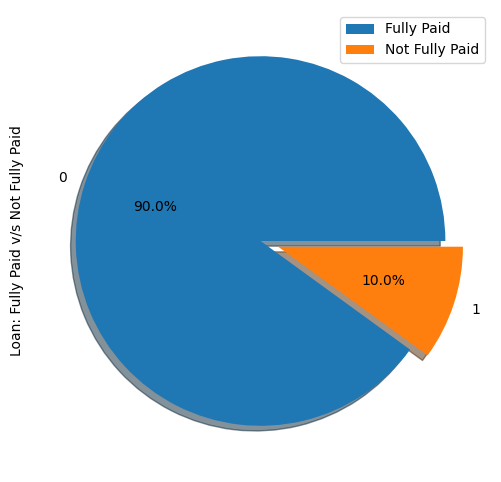

In [3]:
#function to visualise data
def show_data(data):
    count=""
    if isinstance(data, pd.DataFrame):
        count=data['not.fully.paid'].value_counts()
    else:
        count=data.value_counts()
    count.plot(kind='pie',explode=[0,0.1],figsize=(6,6),autopct='%1.1f%%', shadow=True)
    plt.ylabel("Loan: Fully Paid v/s Not Fully Paid")
    plt.legend(["Fully Paid","Not Fully Paid"])
    plt.show()
show_data(loans_data)

In [4]:
print(loans_data.dtypes)

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


In [5]:
#encode data into continuous values
encoded_loans_data = pd.get_dummies(loans_data, prefix = 'purpose', drop_first = 'True')
print(encoded_loans_data.dtypes)

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
not.fully.paid                  int64
purpose_credit_card             uint8
purpose_debt_consolidation      uint8
purpose_educational             uint8
purpose_home_improvement        uint8
purpose_major_purchase          uint8
purpose_small_business          uint8
dtype: object


In [6]:
#split data into train and test
from sklearn.model_selection import train_test_split
X = encoded_loans_data.drop('not.fully.paid', axis = 1)
y = encoded_loans_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 2022)

#RANDOM SAMPLING

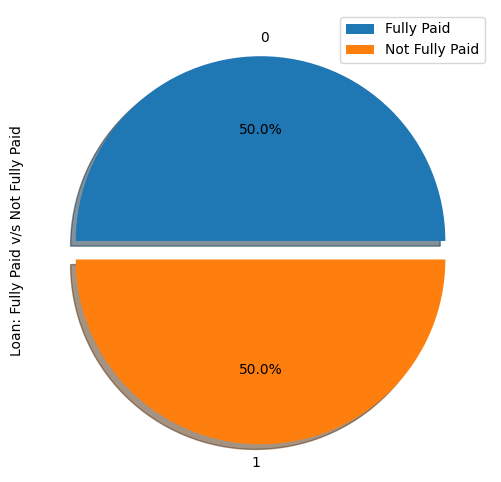

In [7]:
#Code to write random undersampling
X_train_cp = X_train.copy()
X_train_cp['not.fully.paid'] = y_train
y_0 = X_train_cp[X_train_cp['not.fully.paid'] == 0]
y_1 = X_train_cp[X_train_cp['not.fully.paid'] == 1]
y_0_undersample = y_0.sample(y_1.shape[0])
loan_data_undersample = pd.concat([y_0_undersample , y_1], axis = 0)
show_data(loan_data_undersample)


#SMOTE overSampling

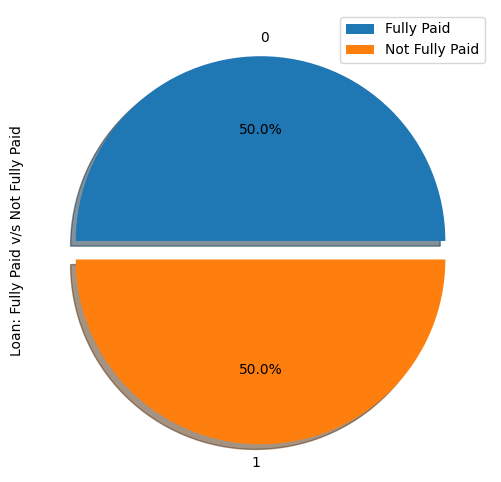

In [8]:
#implement SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_train_SMOTE,y_train_SMOTE = smote.fit_resample(X_train, y_train)
show_data(y_train_SMOTE)